In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from open3d.visualization import Visualizer

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:
name = '9'.rjust(6,'0')


img_path = f'assets/training/image_2/{name}.png'
binary_path = f'assets/training/velodyne/{name}.bin'
pcd_path=f'assets/training/pcd/{name}.pcd'

In [2]:
def bin2pcd(path:str):
    filename=path.split(sep='/')[-1].replace('.bin','.pcd')
    new_path='assets/training/pcd/'+filename
    print(new_path)
    bin_pcd=np.fromfile(path,dtype=np.float32)
    points=bin_pcd.reshape((-1,4))[:,0:3]
    o3d_pcd=o3d.geometry.PointCloud(o3d.utility.Vector3dVector(points))
    o3d.io.write_point_cloud(new_path,o3d_pcd)  

    return new_path
bin2pcd(binary_path)

In [3]:
def viewpcd(path:str):
    cloud=o3d.io.read_point_cloud(path)
    vis=Visualizer()
    vis.create_window(window_name='LiDAR Point Cloud', width=800, height=600,visible=False)
    o3d.visualization.draw_geometries([cloud])

    # vis.destroy_window()

In [4]:

with open(f'assets/training/calib/{name}.txt','r') as f:
    calib = f.readlines()

calib 

000009
assets/training/pcd/000009.pcd


['P0: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 0.000000000000e+00 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00\n',
 'P1: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 -3.875744000000e+02 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 0.000000000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 0.000000000000e+00\n',
 'P2: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 4.485728000000e+01 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 2.163791000000e-01 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 2.745884000000e-03\n',
 'P3: 7.215377000000e+02 0.000000000000e+00 6.095593000000e+02 -3.395242000000e+02 0.000000000000e+00 7.215377000000e+02 1.728540000000e+02 2.199936000000e+00 0.000000000000e+00 0.000000000000e+00 1.000000000000e+00 2.729905000000e-03\n',
 'R0_rect: 9.999239000000e-01 9.837760000000e-

In [5]:
png = mpimg.imread(img_path)
IMG_H,IMG_W,_ = png.shape
png.shape

(375, 1242, 3)

In [6]:
# P2 (3 x 4) for left eye
# P2 intrinsic params of left cam
P2 = np.array([float(x) for x in calib[2].strip('\n').split(' ')[1:]]).reshape(3,4)
P2

array([[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],
       [0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]])

In [7]:
Rot_Matrix = np.array([float(x) for x in calib[4].strip('\n').split(' ')[1:]]).reshape(3,3)
Rot_Matrix

array([[ 0.9999239 ,  0.00983776, -0.00744505],
       [-0.0098698 ,  0.9999421 , -0.00427846],
       [ 0.00740253,  0.00435161,  0.9999631 ]])

In [8]:
# Add a 1 in bottom-right, reshape to 4 x 4
Rot_Matrix = np.insert(Rot_Matrix,3,values=[0,0,0],axis=0)
Rot_Matrix

array([[ 0.9999239 ,  0.00983776, -0.00744505],
       [-0.0098698 ,  0.9999421 , -0.00427846],
       [ 0.00740253,  0.00435161,  0.9999631 ],
       [ 0.        ,  0.        ,  0.        ]])

In [9]:
Rot_Matrix = np.insert(Rot_Matrix,3,values=[0,0,0,1],axis=1)
Rot_Matrix

array([[ 0.9999239 ,  0.00983776, -0.00744505,  0.        ],
       [-0.0098698 ,  0.9999421 , -0.00427846,  0.        ],
       [ 0.00740253,  0.00435161,  0.9999631 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [10]:
Trans_Matrix = np.array([float(x) for x in calib[5].strip('\n').split(' ')[1:]]).reshape(3,4)
Trans_Matrix

array([[ 7.533745e-03, -9.999714e-01, -6.166020e-04, -4.069766e-03],
       [ 1.480249e-02,  7.280733e-04, -9.998902e-01, -7.631618e-02],
       [ 9.998621e-01,  7.523790e-03,  1.480755e-02, -2.717806e-01]])

In [11]:
Trans_Matrix = np.insert(Trans_Matrix,3,values=[0,0,0,1],axis=0)
Trans_Matrix

array([[ 7.533745e-03, -9.999714e-01, -6.166020e-04, -4.069766e-03],
       [ 1.480249e-02,  7.280733e-04, -9.998902e-01, -7.631618e-02],
       [ 9.998621e-01,  7.523790e-03,  1.480755e-02, -2.717806e-01],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00,  1.000000e+00]])

In [12]:
scan = np.fromfile(binary_path, dtype=np.float32).reshape((-1,4))
scan

array([[79.601,  6.188,  2.909,  0.   ],
       [79.603,  6.44 ,  2.91 ,  0.   ],
       [79.309,  7.043,  2.901,  0.   ],
       ...,
       [ 3.704, -1.401, -1.731,  0.22 ],
       [ 3.741, -1.402, -1.747,  0.   ],
       [ 3.762, -1.396, -1.755,  0.   ]], dtype=float32)

In [13]:
points = scan[:, 0:3]
points

array([[79.601,  6.188,  2.909],
       [79.603,  6.44 ,  2.91 ],
       [79.309,  7.043,  2.901],
       ...,
       [ 3.704, -1.401, -1.731],
       [ 3.741, -1.402, -1.747],
       [ 3.762, -1.396, -1.755]], dtype=float32)

In [14]:
velo = np.insert(points,3,1,axis=1).T
velo

array([[79.601, 79.603, 79.309, ...,  3.704,  3.741,  3.762],
       [ 6.188,  6.44 ,  7.043, ..., -1.401, -1.402, -1.396],
       [ 2.909,  2.91 ,  2.901, ..., -1.731, -1.747, -1.755],
       [ 1.   ,  1.   ,  1.   , ...,  1.   ,  1.   ,  1.   ]],
      dtype=float32)

In [15]:
velo = np.delete(velo,np.where(velo[0,:]<0),axis=1)
velo

array([[79.601, 79.603, 79.309, ...,  3.704,  3.741,  3.762],
       [ 6.188,  6.44 ,  7.043, ..., -1.401, -1.402, -1.396],
       [ 2.909,  2.91 ,  2.901, ..., -1.731, -1.747, -1.755],
       [ 1.   ,  1.   ,  1.   , ...,  1.   ,  1.   ,  1.   ]],
      dtype=float32)

In [16]:
cam = P2.dot(Rot_Matrix.dot(Trans_Matrix.dot(velo)))
cam

array([[4.39415243e+04, 4.37609436e+04, 4.31466879e+04, ...,
        3.14814759e+03, 3.17144767e+03, 3.17993290e+03],
       [1.22115857e+04, 1.22131530e+04, 1.21712070e+04, ...,
        1.80213270e+03, 1.82031370e+03, 1.82990489e+03],
       [7.93584363e+01, 7.93604769e+01, 7.90664752e+01, ...,
        3.41614536e+00, 3.45297594e+00, 3.47389207e+00]])

In [17]:
cam = np.delete(cam,np.where(cam[2,:]<0),axis=1)
cam

array([[4.39415243e+04, 4.37609436e+04, 4.31466879e+04, ...,
        3.14814759e+03, 3.17144767e+03, 3.17993290e+03],
       [1.22115857e+04, 1.22131530e+04, 1.21712070e+04, ...,
        1.80213270e+03, 1.82031370e+03, 1.82990489e+03],
       [7.93584363e+01, 7.93604769e+01, 7.90664752e+01, ...,
        3.41614536e+00, 3.45297594e+00, 3.47389207e+00]])

In [18]:
# get u,v,z
cam[:2] /= cam[2,:]
cam

array([[553.70955303, 551.41986719, 545.70142139, ..., 921.54965803,
        918.4679337 , 915.38045422],
       [153.87885988, 153.89465218, 153.93638027, ..., 527.53396123,
        527.17242627, 526.75928057],
       [ 79.3584363 ,  79.36047689,  79.06647515, ...,   3.41614536,
          3.45297594,   3.47389207]])

In [19]:
u,v,z = cam

In [20]:
u_out = np.logical_or(u<0, u>IMG_W)
v_out = np.logical_or(v<0, v>IMG_H)

In [21]:
outlier = np.logical_or(u_out, v_out)
cam = np.delete(cam,np.where(outlier),axis=1)

In [22]:
u,v,z = cam

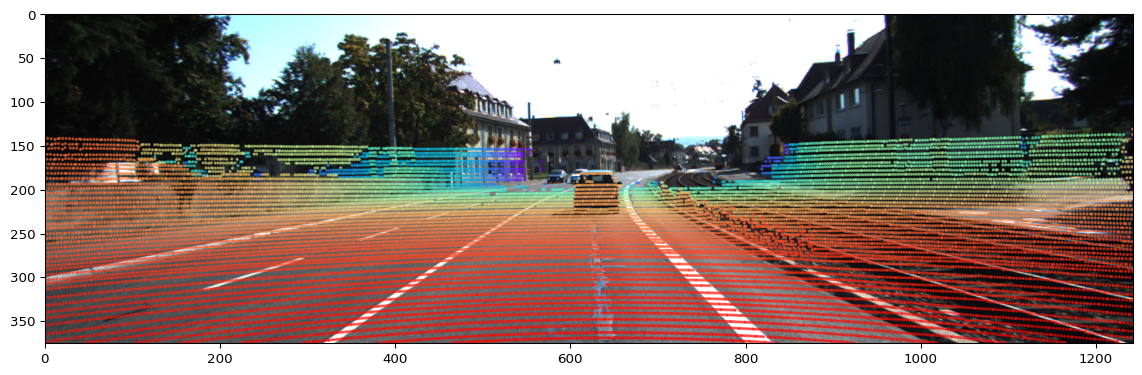

In [23]:
plt.figure(figsize=(12,5),dpi=96,tight_layout=True)
plt.imshow(png)
plt.axis([0,IMG_W,IMG_H,0])
plt.scatter([u],[v],c=[z],cmap='rainbow_r',alpha=0.5,s=2)

viewpcd(pcd_path)
# plt.close()